# 17장. 딥러닝을 이용한 자연어 처리

### 1. 텍스트의 토큰화
* 먼저 텍스트를 잘게 나눈다. 
* 입력할 텍스트가 준비되면 이를 단어별,문장별, 형태소별로 나눌 수 있는데, 이렇게 작게 나누어진 하나의 단위를 **토큰(token)** 이라고 한다. 
* 입력된 텍스트를 잘게 나누는 과정을 **토큰화(tokenization)** 라고 한다.
* 주어진 텍스트를 단어 단위로 쪼개고 나면 이를 이용해 여러가지를 할 수 있다. 
    * 각 단어가 몇 번 중복해서 쓰였는지 알 수 있다. 
    * 단어의 빈도수를 알면 텍스트에서 중요한 역할을 하는 단어를 파악할 수 있다. 
    * 텍스트를 단어 단위로 쪼개는 것은 가장 많이 쓰이는 전처리 과정. 

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.utils import to_categorical
from numpy import array

# 케라스의 텍스트 전처리와 관련한 함수중 text_to_word_sequence 함수를 불러옵니다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence   # keras의 text모듈의 text_to_word_sequence()함수를 사용하면 문장을 단어단위로 쉽게 나눌 수 있다.

# 전처리할 텍스트를 정합니다.
text = '해보지 않으면 해낼 수 없다'

#텍스트를 토큰화
result = text_to_word_sequence(text)
print('\n원문:\n', text)
print('\n토큰화:\n', result)


원문:
 해보지 않으면 해낼 수 없다

토큰화:
 ['해보지', '않으면', '해낼', '수', '없다']


In [2]:
# 단어의 빈도 수 세기

# 전처리하려는 세 개의 문장을 정합니다.
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화해야 딥러닝에서 인식됩니다.',
       '토큰화한 결과는 딥러닝에서 사용할 수 있습니다.',
       ]
 
# 토큰화 함수를 이용해 전처리 하는 과정입니다.
token = Tokenizer()             # 토큰화 함수 지정
token.fit_on_texts(docs)       # 토큰화 함수에 문장 적용
 
# 단어의 빈도수를 계산한 결과를 각 옵션에 맞추어 출력합니다.
# Tokenizer()의 word_counts 함수는 순서를 기억하는 OrderedDict 클래스를 사용합니다.
print("\n단어 카운트:\n", token.word_counts) 

# 출력되는 순서는 랜덤입니다. 
print("\n문장 카운트: ", token.document_count)
print("\n각 단어가 몇 개의 문장에 포함되어 있는가:\n", token.word_docs)
print("\n각 단어에 매겨진 인덱스 값:\n",  token.word_index)     #단어의 인덱스는 문장에 위치한 순서대로가 아닌 말뭉치로 알아서 매겨진다.


단어 카운트:
 OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 1), ('합니다', 1), ('단어로', 1), ('토큰화해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('토큰화한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])

문장 카운트:  3

각 단어가 몇 개의 문장에 포함되어 있는가:
 defaultdict(<class 'int'>, {'합니다': 1, '각': 1, '나누어': 1, '단어를': 1, '텍스트의': 2, '먼저': 1, '토큰화': 1, '단어로': 1, '딥러닝에서': 2, '인식됩니다': 1, '토큰화해야': 1, '사용할': 1, '수': 1, '결과는': 1, '있습니다': 1, '토큰화한': 1})

각 단어에 매겨진 인덱스 값:
 {'텍스트의': 1, '딥러닝에서': 2, '먼저': 3, '각': 4, '단어를': 5, '나누어': 6, '토큰화': 7, '합니다': 8, '단어로': 9, '토큰화해야': 10, '인식됩니다': 11, '토큰화한': 12, '결과는': 13, '사용할': 14, '수': 15, '있습니다': 16}


### 2. 단어의 원-핫 인코딩

In [3]:
text = '오랫동안 꿈꾸는 이는 그 꿈을 닮아간다.'
token = Tokenizer()
token.fit_on_texts([text])
print(token.word_index)

{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}


In [4]:
text1 = '오랫동안 꿈꾸는 이는 그 꿈을 꿈을 닮아간다.'
token = Tokenizer()
token.fit_on_texts([text1])
print(token.word_index)     # token.word_index 는 같은 단어를 여러번 입력해도 한번만 나온다.

{'꿈을': 1, '오랫동안': 2, '꿈꾸는': 3, '이는': 4, '그': 5, '닮아간다': 6}


In [5]:
x = token.texts_to_sequences([text])
print(x)

[[2, 3, 4, 5, 1, 6]]


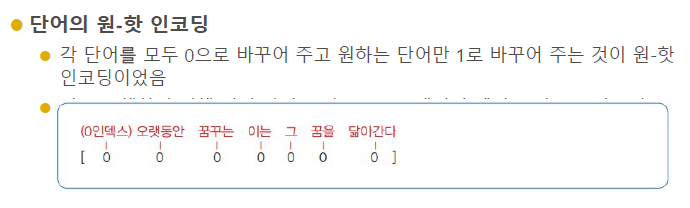

In [6]:
#인덱스 수에 하나를 추가해서 원-핫 인코딩 배열 먼들기
word_size = len(token.word_index) + 1       # 1열에 모두 0이 나오도록 1을 추가한 것.
x = to_categorical(x, num_classes = word_size)
print(x)

[[[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


In [7]:
text

'오랫동안 꿈꾸는 이는 그 꿈을 닮아간다.'

### 3. 단어 임베딩
* 원 핫 인코딩을 그대로 사용하면 벡터의 길이가 너무 길어진다는 단점이 있음. 
* 예를들어 1만개의 단어 토큰으로 이루어진 말뭉치를 다룬다고 할 때, <br>이 데이터를 원-핫 인코딩으로 벡터화하면 9,999개의 0과 하나의 1로 이루어진 단어벡터를 1만개나 만들어야함 <br>=> 공간낭비를 해결하기 위해 **단어 임베딩** 
### 4. 텍스트를 읽고 긍정, 부정 예측하기

In [8]:
# 텍스트 리뷰 자료를 지정합니다.
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요","별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]

# 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스를 지정합니다.
classes = array([1,1,1,1,1,0,0,0,0,0])

# 토큰화 
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)


{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


In [9]:
x = token.texts_to_sequences(docs)
print('\n리뷰 텍스트, 토큰화 결과: \n', x)
# 각 단어가 1부터 20까지의 숫자로 토큰화 되었다. 
# 딥러닝 모델에 입력하려면 학습 데이터의 길이가 동일해야함. 
# 토큰의 수를 똑같이 맞춰주어야함


리뷰 텍스트, 토큰화 결과: 
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]


In [11]:
# 패딩, 서로 다른 길이의 데이터를 4로 맞춰준다. 
padded_x = pad_sequences(x, 4)      # 위의 리뷰텍스트를 토큰화한 결과 가장 긴 벡터의 길이가 4이다. 따라서 다른 벡터의 길이도 4로 맞춰준다.
print('\n패딩 결과: \n', padded_x)


패딩 결과: 
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


* 예시
* model.add(Embedding(16, 4, input_length = 2))     
* 입력될 총 단어 수는 16, 임베딩 후 출려되는 벡터 크기는 4. 총 입력되는 단어 수는 16개이지만 매번 2개 씩만 넣겠다

In [14]:
# 임베딩에 입력될 단어의 수를 지정한다. 
word_size = len(token.word_index) + 1       # 20개

# 단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과를 출력한다. 
model = Sequential()
model.add(Embedding(word_size, 8, input_length = 4))    
# word_size가 8로 줄어들게 함.입력될 총 단어수는 20개, 임베딩 후 출력되는 벡터의 크기는 8, 20개 중 4개씩만 집어넣어서 8개로 만듦.
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              168       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(padded_x, classes, epochs = 20)
print('\n Acccuracy: %.4f' % (model.evaluate(padded_x,classes)[1]))

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6942 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6921 - accuracy: 0.7000
Epoch 3/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6899 - accuracy: 0.7000
Epoch 4/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6878 - accuracy: 0.7000
Epoch 5/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6857 - accuracy: 0.8000
Epoch 6/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6835 - accuracy: 0.8000
Epoch 7/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6814 - accuracy: 0.9000
Epoch 8/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6793 - accuracy: 0.9000
Epoch 9/20
1/1 [==============================] - 0s 15ms/step - loss: 0.6771 - accuracy: 0.9000
Epoch 10/20
1/1 [==============================] - 0s 15ms/step - loss: 0.6750 - accuracy: 0.9000
Epoch 11/20
1/1 [==============